In [1]:
function bubbleSort!(a)
    n = length(a)
    for i in 1:n-1
        for j in 1:n-i
            if a[j] > a[j+1]
                a[j], a[j+1] = a[j+1], a[j]
            end
        end
    end
    return a
end

bubbleSort! (generic function with 1 method)

In [2]:
data = [65,51,32,12,23,84,68,1]
bubbleSort!(data)

8-element Vector{Int64}:
  1
 12
 23
 32
 51
 65
 68
 84

In [3]:
using Pkg
Pkg.add("StatsBase")

    Updating registry at `C:\Users\DSEP0001\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
    Updating `C:\Users\DSEP0001\.julia\environments\v1.6\Project.toml`
  [2913bbd2] + StatsBase v0.33.19
  No Changes to `C:\Users\DSEP0001\.julia\environments\v1.6\Manifest.toml`


In [7]:
using LinearAlgebra, StatsBase

# Transition probability matrix
P = [0.5 0.4 0.1;
    0.3 0.2 0.5;
    0.5 0.3 0.2]

# First way
piProb1 = (P^100)[1,:]

# Second way
A = vcat((P' - Matrix{Float64}(I, 3, 3))[1:2,:],ones(3)')
b = [0 0 1]'
piProb2 = A\b

# Third way
eigVecs = eigvecs(copy(P'))
highestVec = eigVecs[:,findmax(abs.(eigvals(P)))[2]]
piProb3 = Array{Float64}(highestVec)/norm(highestVec,1);

# Fourth way
numInState = zeros(3)
state = 1
N = 10^6
for t in 1:N
    numInState[state] += 1
    global state = sample(1:3,weights(P[state,:]))
end
piProb4 = numInState/N

[piProb1 piProb2 piProb3 piProb4]

3×4 Matrix{Float64}:
 0.4375  0.4375  0.4375  0.437999
 0.3125  0.3125  0.3125  0.311783
 0.25    0.25    0.25    0.250218

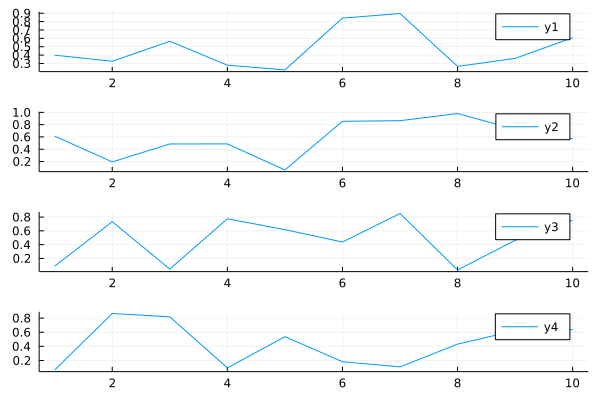

In [20]:
# https://docs.juliaplots.org/latest/tutorial/
using Plots
y = rand(10, 4)
plot(x, y, layout = (4, 1))

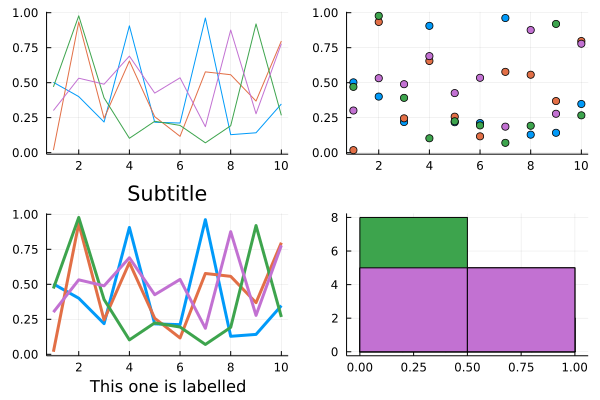

In [16]:
p1 = plot(x, y) # Make a line plot
p2 = scatter(x, y) # Make a scatter plot
p3 = plot(x, y, xlabel = "This one is labelled", lw = 3, title = "Subtitle")
p4 = histogram(x, y) # Four histograms each with 10 points? Why not!
plot(p1, p2, p3, p4, layout = (2, 2), legend = false)

   Resolving package versions...
   Installed WoodburyMatrices ── v0.5.5
   Installed TableOperations ─── v1.2.0
   Installed KernelDensity ───── v0.6.4
   Installed Ratios ──────────── v0.4.3
   Installed AxisAlgorithms ──── v1.0.1
   Installed Arpack ──────────── v0.5.3
   Installed StatsPlots ──────── v0.14.33
   Installed Arpack_jll ──────── v3.5.0+3
   Installed Observables ─────── v0.4.0
   Installed Widgets ─────────── v0.6.6
   Installed MultivariateStats ─ v0.9.0
   Installed NearestNeighbors ── v0.4.11
   Installed DataValues ──────── v0.4.13
   Installed Clustering ──────── v0.14.2
   Installed Interpolations ──── v0.13.6
    Updating `C:\Users\DSEP0001\.julia\environments\v1.6\Project.toml`
  [f3b207a7] + StatsPlots v0.14.33
    Updating `C:\Users\DSEP0001\.julia\environments\v1.6\Manifest.toml`
  [7d9fca2a] + Arpack v0.5.3
  [13072b0f] + AxisAlgorithms v1.0.1
  [aaaa29a8] + Clustering v0.14.2
  [e7dc6d0d] + DataValues v0.4.13
  [a98d9a8b] + Interpolations v0.13.6
  [5ab086

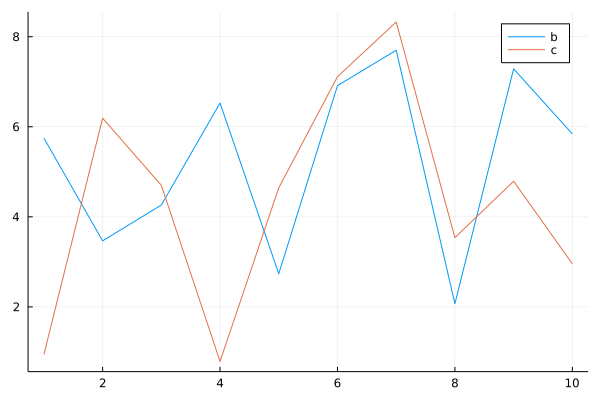

In [18]:
Pkg.add("StatsPlots")
using StatsPlots # Required for the DataFrame user recipe
# Now let's create the DataFrame
using DataFrames
df = DataFrame(a = 1:10, b = 10 * rand(10), c = 10 * rand(10))
# Plot the DataFrame by declaring the points by the column names
@df df plot(:a, [:b :c]) # x = :a, y = [:b :c]. Notice this is two columns!

   Resolving package versions...
  No Changes to `C:\Users\DSEP0001\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\DSEP0001\.julia\environments\v1.6\Manifest.toml`


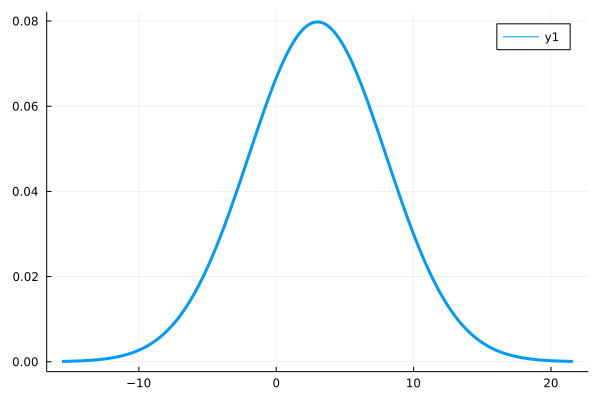

In [19]:
Pkg.add("Distributions")
using Distributions
plot(Normal(3, 5), lw = 3)

In [22]:
Pkg.add("MarketData")
Pkg.add("TimeSeries")
using Plots, MarketData, TimeSeries
gr()
ta = yahoo(:GOOG, YahooOpt(period1 = now() - Month(1)))

   Resolving package versions...
   Installed StructTypes ─ v1.8.1
   Installed JSON3 ─────── v1.9.5
   Installed TimeSeries ── v0.23.0
   Installed MarketData ── v0.13.12
    Updating `C:\Users\DSEP0001\.julia\environments\v1.6\Project.toml`
  [945b72a4] + MarketData v0.13.12
    Updating `C:\Users\DSEP0001\.julia\environments\v1.6\Manifest.toml`
  [0f8b85d8] + JSON3 v1.9.5
  [945b72a4] + MarketData v0.13.12
  [856f2bd8] + StructTypes v1.8.1
  [9e3dc215] + TimeSeries v0.23.0
Precompiling project...
  ✓ StructTypes
  ✓ TimeSeries
  ✓ JSON3
  ✓ MarketData
  4 dependencies successfully precompiled in 14 seconds (372 already precompiled, 4 skipped during auto due to previous errors)
   Resolving package versions...
    Updating `C:\Users\DSEP0001\.julia\environments\v1.6\Project.toml`
  [9e3dc215] + TimeSeries v0.23.0
  No Changes to `C:\Users\DSEP0001\.julia\environments\v1.6\Manifest.toml`


19×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2022-06-27 to 2022-07-22
│            │ Open     │ High     │ Low      │ Close    │ AdjClose │
├────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ 2022-06-27 │ 118.935  │ 119.25   │ 116.0007 │ 116.6225 │ 116.6225 │
│ 2022-06-28 │ 116.351  │ 117.8565 │ 112.444  │ 112.5715 │ 112.5715 │
│ 2022-06-29 │ 112.1485 │ 113.6645 │ 111.554  │ 112.2565 │ 112.2565 │
│ 2022-06-30 │ 110.4995 │ 111.3298 │ 107.31   │ 109.3725 │ 109.3725 │
│ 2022-07-01 │ 108.337  │ 109.8064 │ 107.105  │ 109.081  │ 109.081  │
│ 2022-07-05 │ 107.5145 │ 114.0526 │ 106.2495 │ 113.887  │ 113.887  │
│ 2022-07-06 │ 114.092  │ 116.352  │ 112.2505 │ 115.2135 │ 115.2135 │
│ 2022-07-07 │ 116.008  │ 119.862  │ 115.534  │ 119.306  │ 119.306  │
│ 2022-07-08 │ 117.55   │ 120.435  │ 117.514  │ 120.1685 │ 120.1685 │
│ 2022-07-11 │ 118.65   │ 118.7945 │ 116.2345 │ 116.5225 │ 116.5225 │
│ 2022-07-12 │ 116.8385 │ 117.8495 │ 114.615  │ 114.8495 │ 114.8495 │
│ 2022-07-13 │ 

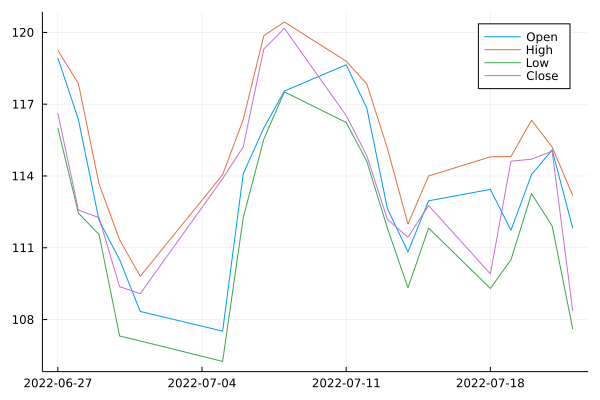

In [23]:
plot(ta[:Open, :High, :Low, :Close])

┌ Warning: Keyword argument hover not supported with Plots.GRBackend().  Choose from: Set([:top_margin, :group, :inset_subplots, :background_color, :ytickfontsize, :yforeground_color_text, :yguidefontcolor, :tickfontfamily, :show_empty_bins, :seriesalpha, :seriescolor, :ztick_direction, :xgrid, :ygridalpha, :zlims, :xtick_direction, :colorbar, :legend_font_family, :zflip, :ticks, :linealpha, :overwrite_figure, :arrow, :xguidefonthalign, :normalize, :linestyle, :xtickfontvalign, :xflip, :zgrid, :fillcolor, :ygrid, :bar_width, :colorbar_scale, :background_color_inside, :zguidefonthalign, :bins, :zguide, :zforeground_color_text, :legend_font_valign, :yscale, :legend_font_color, :weights, :xgridalpha, :ygridstyle, :clims, :xtickfontcolor, :fill_z, :xguide, :markershape, :background_color_subplot, :ztickfontfamily, :fillalpha, :markerstrokewidth, :tick_direction, :xguidefontvalign, :xguidefontfamily, :gridlinewidth, :foreground_color_subplot, :xgridlinewidth, :yguidefontsize, :foreground_co

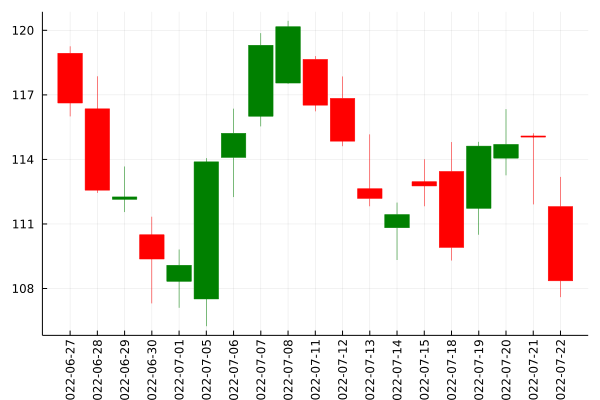

In [24]:
plot(ta, seriestype = :candlestick)